# 영화 총 상영주차 예측

## 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
movie_data= pd.read_csv("C:/Users/강태희/Documents/BAF-25-2-Marketing/week_predict/full_data_for_week_predict.csv")
movie_data.head()

,Movie_Title,Total_Audience_Count,Total_Show_Days,Total_Weeks,wk1_Audience,wk1_AudiencePerShow,wk2_Audience,wk2_AudiencePerShow,Show_Change,opening_Ho_Retention,...,e247,e248,e249,e250,e251,e252,e253,e254,e255,e256
0,도쿄 리벤저스,13122,47,8,8617.0,5.654199,2925,5.034423,0.381234,0.130780,...,0.014526,-0.000427,-0.020264,-0.001076,-0.061279,-0.018188,-0.023438,0.012329,0.036133,0.010742
1,매직브러시,169106,36,8,145560.0,37.670807,18117,14.717303,0.318582,0.182869,...,-0.022339,-0.037598,-0.021973,0.033936,-0.026855,0.005646,0.013794,-0.010071,0.014709,0.017578
2,숨바꼭질,656089,48,8,195760.0,92.645528,307980,65.807692,2.214860,0.892172,...,-0.000511,-0.023926,-0.005707,-0.001305,-0.061523,-0.008118,-0.018921,0.002823,0.055176,0.015747
3,해빙,1201576,52,9,906864.0,44.818820,232306,13.362439,0.859197,0.189943,...,0.007996,-0.017456,0.000427,-0.008911,-0.024536,-0.024658,-0.013306,0.004303,0.047119,0.011414
4,"다시, 봄",25506,18,4,18609.0,5.126446,3969,3.598368,0.303857,0.028099,...,0.052734,-0.000683,-0.014465,0.025146,-0.018188,-0.022705,-0.027100,-0.036621,0.073242,-0.016113


In [3]:
fa_data= pd.read_csv("C:/Users/강태희/Documents/BAF-25-2-Marketing/week_predict/fa_data_for_week_predict.csv")
fa_data.head()

,Movie_Title,FA1,FA2,FA3,FA4,FA5
0,도쿄 리벤저스,-0.581703,-0.873621,0.334321,-0.860584,-0.302076
1,매직브러시,-0.235392,0.273776,-1.353467,-0.748044,-0.342353
2,숨바꼭질,0.103283,2.615669,0.523378,1.502512,0.556472
3,해빙,1.734376,-0.007841,0.617193,-1.091703,-0.357989
4,"다시, 봄",-0.598004,-0.887915,0.400546,-1.055799,-0.290591


In [4]:
hit_data= pd.read_csv("C:/Users/강태희/Documents/BAF-25-2-Marketing/week_predict/movie_hit_category.csv")
hit_data.head()

,Movie_Title,hit_category
0,도쿄 리벤저스,중반 균형형
1,매직브러시,초반 폭발형
2,숨바꼭질,초반 폭발형
3,해빙,초반 폭발형
4,"다시, 봄",중반 균형형


In [5]:
# 데이터 합치기
df= pd.merge(movie_data, fa_data, on="Movie_Title", how="inner")
df= pd.merge(df, hit_data, on="Movie_Title", how="inner")
df.head()

,Movie_Title,Total_Audience_Count,Total_Show_Days,Total_Weeks,wk1_Audience,wk1_AudiencePerShow,wk2_Audience,wk2_AudiencePerShow,Show_Change,opening_Ho_Retention,...,e253,e254,e255,e256,FA1,FA2,FA3,FA4,FA5,hit_category
0,도쿄 리벤저스,13122,47,8,8617.0,5.654199,2925,5.034423,0.381234,0.130780,...,-0.023438,0.012329,0.036133,0.010742,-0.581703,-0.873621,0.334321,-0.860584,-0.302076,중반 균형형
1,매직브러시,169106,36,8,145560.0,37.670807,18117,14.717303,0.318582,0.182869,...,0.013794,-0.010071,0.014709,0.017578,-0.235392,0.273776,-1.353467,-0.748044,-0.342353,초반 폭발형
2,숨바꼭질,656089,48,8,195760.0,92.645528,307980,65.807692,2.214860,0.892172,...,-0.018921,0.002823,0.055176,0.015747,0.103283,2.615669,0.523378,1.502512,0.556472,초반 폭발형
3,해빙,1201576,52,9,906864.0,44.818820,232306,13.362439,0.859197,0.189943,...,-0.013306,0.004303,0.047119,0.011414,1.734376,-0.007841,0.617193,-1.091703,-0.357989,초반 폭발형
4,"다시, 봄",25506,18,4,18609.0,5.126446,3969,3.598368,0.303857,0.028099,...,-0.027100,-0.036621,0.073242,-0.016113,-0.598004,-0.887915,0.400546,-1.055799,-0.290591,중반 균형형


총 상영주차 예측에 쓸 변수는 FA4, 팬데믹, 영화 대표 제작국가, 영화 흥행 패턴  
여기서 추가할 변수를 찾기 위해 상관계수를 구해본다

## 상관계수 분석

In [6]:
df['hit_category'].value_counts()

hit_category
초반 폭발형     1695
중반 균형형      694
후반 입소문형     179
Name: count, dtype: int64

In [6]:
#범주형 변수 원핫인코딩
cat_cols = ['Month', 'Pandemic', 'Grade', 'Main_Country','hit_category']

# 원핫인코딩
combined_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=False, dtype=int)

# 한글 → 영어 변수명 매핑
rename_map = {
    # Grade (관람등급)
    'Grade_전체관람가': 'Grade_All',
    'Grade_12세이상관람가': 'Grade_12plus',
    'Grade_15세이상관람가': 'Grade_15plus',
    'Grade_청소년관람불가': 'Grade_Restricted',

    # Main_Country (국가)
    'Main_Country_한국': 'Country_KR',
    'Main_Country_미국': 'Country_US',
    'Main_Country_일본': 'Country_JP',
    'Main_Country_기타': 'Country_Other',

    # hit_category (영화 흥행 패턴)
    'hit_category_초반 폭발형': 'Early_Explosion',
    'hit_category_중반 균형형': 'Mid_Balanced',
    'hit_category_후반 입소문형': 'Later_Viral'
}
combined_encoded = combined_encoded.rename(columns=rename_map)


In [7]:
combined_encoded.head()

,Movie_Title,Total_Audience_Count,Total_Show_Days,Total_Weeks,wk1_Audience,wk1_AudiencePerShow,wk2_Audience,wk2_AudiencePerShow,Show_Change,opening_Ho_Retention,...,Grade_15plus,Grade_All,Grade_Restricted,Country_Other,Country_US,Country_JP,Country_KR,Mid_Balanced,Early_Explosion,Later_Viral
0,도쿄 리벤저스,13122,47,8,8617.0,5.654199,2925,5.034423,0.381234,0.130780,...,1,0,0,0,0,1,0,1,0,0
1,매직브러시,169106,36,8,145560.0,37.670807,18117,14.717303,0.318582,0.182869,...,0,1,0,1,0,0,0,0,1,0
2,숨바꼭질,656089,48,8,195760.0,92.645528,307980,65.807692,2.214860,0.892172,...,1,0,0,0,1,0,0,0,1,0
3,해빙,1201576,52,9,906864.0,44.818820,232306,13.362439,0.859197,0.189943,...,1,0,0,0,0,0,1,0,1,0
4,"다시, 봄",25506,18,4,18609.0,5.126446,3969,3.598368,0.303857,0.028099,...,0,0,0,0,0,0,1,1,0,0


In [14]:
# 주요 변수 지정
core_vars = ["FA4", "Pandemic_0", "Pandemic_1", "Pandemic_2", "Country_Other","Country_US",	"Country_JP","Country_KR", 
             'Early_Explosion', 'Mid_Balanced','Later_Viral']

# FA1~FA3, FA5, e1~e256 제외 (이전과 동일)
cols_to_drop = [f"e{i}" for i in range(1, 257)] + ["FA1", "FA2", "FA3", "FA5","Movie_Title"]
filtered_df = combined_encoded.drop(columns=cols_to_drop, errors="ignore")

# 상관계수 행렬 계산
corr_matrix = filtered_df.corr()

# 핵심 변수들과의 상관관계만 추출
corr_with_core = corr_matrix[core_vars]

# 절댓값이 큰 변수들만 선택 (예: |r| > 0.5)
threshold = 0.5
high_corr = corr_with_core[abs(corr_with_core) > threshold].dropna(how='all')

# 핵심 변수 자기 자신 제외
high_corr = high_corr.loc[~high_corr.index.isin(core_vars)]

# 결과 확인
print("핵심 변수들과 상관계수가 높은 변수들:")
print(high_corr)

핵심 변수들과 상관계수가 높은 변수들:
                           FA4  Pandemic_0  Pandemic_1  Pandemic_2  \
Total_Show_Days            NaN         NaN         NaN         NaN   
Total_Weeks                NaN         NaN         NaN         NaN   
wk2_AudiencePerShow   0.592138         NaN         NaN         NaN   
Show_Change           0.716173         NaN         NaN         NaN   
opening_Ho_Retention  0.964034         NaN         NaN         NaN   
Year                       NaN   -0.723462         NaN    0.530996   

                      Country_Other  Country_US  Country_JP  Country_KR  \
Total_Show_Days                 NaN         NaN         NaN         NaN   
Total_Weeks                     NaN         NaN         NaN         NaN   
wk2_AudiencePerShow             NaN         NaN         NaN         NaN   
Show_Change                     NaN         NaN         NaN         NaN   
opening_Ho_Retention            NaN         NaN         NaN         NaN   
Year                            NaN  

In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

X = combined_encoded[["FA4", "Pandemic_0", "Pandemic_1", "Pandemic_2", "Country_Other","Country_US", "Country_JP","Country_KR", 
                      'Early_Explosion', 'Mid_Balanced','Later_Viral',
                      "wk2_AudiencePerShow", "Show_Change", "opening_Ho_Retention"]].dropna()

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

                 feature        VIF
0                    FA4  19.585708
1             Pandemic_0        inf
2             Pandemic_1        inf
3             Pandemic_2        inf
4          Country_Other        inf
5             Country_US        inf
6             Country_JP        inf
7             Country_KR        inf
8        Early_Explosion        inf
9           Mid_Balanced        inf
10           Later_Viral        inf
11   wk2_AudiencePerShow   1.867773
12           Show_Change   2.545153
13  opening_Ho_Retention  16.111717


c:\uni\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [11]:
# opening_Ho_Retentiond을 제외하고 다시 vif 구해보기

X = combined_encoded[["FA4", "Pandemic_0", "Pandemic_1", "Pandemic_2", "Country_Other","Country_US", "Country_JP","Country_KR", 
                      'Early_Explosion', 'Mid_Balanced','Later_Viral',
                      "wk2_AudiencePerShow", "Show_Change"]].dropna()

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

                feature       VIF
0                   FA4  2.525333
1            Pandemic_0       inf
2            Pandemic_1       inf
3            Pandemic_2       inf
4         Country_Other       inf
5            Country_US       inf
6            Country_JP       inf
7            Country_KR       inf
8       Early_Explosion       inf
9          Mid_Balanced       inf
10          Later_Viral       inf
11  wk2_AudiencePerShow  1.865931
12          Show_Change  2.376742


c:\uni\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


총 상영주차 예측에 쓸 변수는 FA4, 팬데믹, 영화 대표 제작국가, 영화 흥행 패턴  
여기서 추가로 wk2_AudiencePerShow ,Show_Change 만 사용할 것

## 학습 데이터셋 설정

In [8]:
# 다시 train / test 분리
df_train_encoded = combined_encoded.iloc[:2054, :].copy()
df_test_encoded = combined_encoded.iloc[2054:, :].copy()

# 확인
print("Train shape:", df_train_encoded.shape)
print("Test shape:", df_test_encoded.shape)
print(df_test_encoded.head())

Train shape: (2054, 307)
Test shape: (514, 307)
                  Movie_Title  Total_Audience_Count  Total_Show_Days  \
2054  버즈 오브 프레이(할리 퀸의 황홀한 해방)                400643               63   
2055                      언데드                214638               41   
2056                   정글 크루즈                246029               28   
2057                       핸콕               2722284               35   
2058                     잭 리처                782892               22   

      Total_Weeks  wk1_Audience  wk1_AudiencePerShow  wk2_Audience  \
2054           10      264467.0            11.721789        115766   
2055            7      123849.0            30.258734         68579   
2056            5      155216.0            13.723784         81108   
2057            6     1318928.0            72.033206        979822   
2058            4      464142.0            60.839166        278123   

      wk2_AudiencePerShow  Show_Change  opening_Ho_Retention  ...  \
2054             8.792132    

In [32]:
# 학습 데이터셋 만들기

# 1. 타겟 (Y) 컬럼 목록 정의
target_columns = ['Total_Weeks']

# 2. X (특성 데이터) 생성: 타겟 컬럼들을 제외한 나머지
X = df_train_encoded[["FA4", "Pandemic_0", "Pandemic_1", "Pandemic_2", "Country_Other","Country_US",	"Country_JP","Country_KR", 
                     'Early_Explosion', 'Mid_Balanced','Later_Viral','wk2_AudiencePerShow','Show_Change']]

# 3. Y (타겟 데이터) 생성: 타겟 컬럼들만 선택
y = df_train_encoded[target_columns]

# 결과 확인
print(X.columns.tolist())
print(y.columns.tolist())

['FA4', 'Pandemic_0', 'Pandemic_1', 'Pandemic_2', 'Country_Other', 'Country_US', 'Country_JP', 'Country_KR', 'Early_Explosion', 'Mid_Balanced', 'Later_Viral', 'wk2_AudiencePerShow', 'Show_Change']
['Total_Weeks']


In [33]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
X_train.shape[0]

1643

In [35]:
X_train.shape[1]

13

## XGB 모델 예측

옵튜나로 파라미터 조절

In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
from xgboost import XGBRegressor

In [13]:
import optuna

In [52]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def objective(trial):
    params = {
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-8, 10),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-8, 10),
        'random_state': 42,
        'tree_method': 'hist'  
    }

    model = XGBRegressor(**params)
    model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)

    y_pred = model.predict(X_val)

    # 여러 지표 계산
    rmse_val = rmse(y_val, y_pred)
    mae_val = mean_absolute_error(y_val, y_pred)
    r2_val = r2_score(y_val, y_pred)

    # 참고용 출력 (튜닝 과정에서 로그로 볼 수 있음)
    trial.set_user_attr("MAE", mae_val)
    trial.set_user_attr("R2", r2_val)

    # 최적화 기준은 RMSE (낮을수록 좋음)
    return rmse_val

# Optuna 실행
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

# 결과 출력
best_trial = study.best_trial
print(f"Best RMSE: {best_trial.value:.4f}")
print("Best Parameters:")
for key, value in best_trial.params.items():
    print(f"  {key}: {value}")
print(f"MAE: {best_trial.user_attrs['MAE']:.4f}, R²: {best_trial.user_attrs['R2']:.4f}")

[I 2025-11-03 18:14:03,324] A new study created in memory with name: no-name-4f089993-30be-4eb3-8949-e0aaae9858dc
[I 2025-11-03 18:14:04,234] Trial 0 finished with value: 4.954547629725761 and parameters: {'max_depth': 5, 'learning_rate': 0.1974384660476855, 'n_estimators': 256, 'subsample': 0.8704270428014653, 'colsample_bytree': 0.7246833079313311, 'min_child_weight': 1, 'reg_alpha': 6.765392299377129, 'reg_lambda': 0.1540401744356359}. Best is trial 0 with value: 4.954547629725761.
[I 2025-11-03 18:14:04,448] Trial 1 finished with value: 4.87195872747701 and parameters: {'max_depth': 5, 'learning_rate': 0.12085921317684582, 'n_estimators': 103, 'subsample': 0.7324299441998614, 'colsample_bytree': 0.5504200102857477, 'min_child_weight': 7, 'reg_alpha': 6.933716224918623, 'reg_lambda': 7.443413982581855}. Best is trial 1 with value: 4.87195872747701.
[I 2025-11-03 18:14:04,782] Trial 2 finished with value: 4.77498020599403 and parameters: {'max_depth': 9, 'learning_rate': 0.0758493778

Best RMSE: 4.6594
Best Parameters:
  max_depth: 3
  learning_rate: 0.0185460119639627
  n_estimators: 446
  subsample: 0.5982013911067369
  colsample_bytree: 0.9989002824900927
  min_child_weight: 4
  reg_alpha: 0.7823191644342076
  reg_lambda: 2.940216934269445
MAE: 2.6531, R²: 0.4460


XGB의 Best Parameters:   
  max_depth: 3  
  learning_rate: 0.0185460119639627  
  n_estimators: 446  
  subsample: 0.5982013911067369  
  colsample_bytree: 0.9989002824900927  
  min_child_weight: 4  
  reg_alpha: 0.7823191644342076  
  reg_lambda: 2.940216934269445  

### random search로 파라미터 조절

In [31]:
import numpy as np
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

In [36]:
xgb = XGBRegressor(
    objective='reg:squarederror',
    tree_method='hist',      
    random_state=42,
    n_estimators=500         
)

# -----------------------------------------
# 랜덤서치 하이퍼파라미터 범위 정의
# -----------------------------------------
param_distributions = {
    'learning_rate': np.linspace(0.01, 0.3, 30),
    'max_depth': np.arange(3, 10),
    'min_child_weight': np.arange(1, 10),
    'subsample': np.linspace(0.5, 1.0, 6),
    'colsample_bytree': np.linspace(0.5, 1.0, 6),
    'gamma': np.linspace(0, 5, 11),
    'reg_alpha': np.logspace(-3, 1, 10),  # L1 정규화
    'reg_lambda': np.logspace(-3, 1, 10)  # L2 정규화
}

# -----------------------------------------
# RandomizedSearchCV 실행
# -----------------------------------------
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_distributions,
    n_iter=50,                   # 랜덤 탐색 시도 횟수 (보통 30~100 적당)
    scoring='neg_root_mean_squared_error',
    cv=5,                        
    verbose=2,
    random_state=42,
    n_jobs=-1                    
)

random_search.fit(X_train, y_train)

# -----------------------------------------
# 결과 출력
# -----------------------------------------
print("\ Best RMSE (CV):", -random_search.best_score_)
print(" Best Parameters:", random_search.best_params_)

# -----------------------------------------
# 6️⃣ 최적 모델로 테스트 세트 평가
# -----------------------------------------
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_val)

rmse = mean_squared_error(y_val, y_pred, squared=False)
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print("\n Test Set Performance")
print(f"RMSE: {rmse:.4f}")
print(f"MAE : {mae:.4f}")
print(f"R²  : {r2:.4f}")

<>:41: SyntaxWarning: invalid escape sequence '\ '
<>:41: SyntaxWarning: invalid escape sequence '\ '
C:\Users\강태희\AppData\Local\Temp\ipykernel_20304\2783306007.py:41: SyntaxWarning: invalid escape sequence '\ '
  print("\ Best RMSE (CV):", -random_search.best_score_)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
\ Best RMSE (CV): 3.7269386615490867
 Best Parameters: {'subsample': 1.0, 'reg_lambda': 10.0, 'reg_alpha': 0.001, 'min_child_weight': 1, 'max_depth': 3, 'learning_rate': 0.16999999999999998, 'gamma': 3.0, 'colsample_bytree': 1.0}

 Test Set Performance
RMSE: 4.7939
MAE : 2.7218
R²  : 0.4136


c:\uni\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## LGB 모델 예측

In [45]:
from lightgbm import LGBMRegressor

In [46]:
def objective(trial):
    params = {
        'num_leaves': trial.suggest_int('num_leaves', 20, 40),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'min_child_weight': trial.suggest_int('min_child_weight', 5, 20),
        'max_depth': trial.suggest_int('max_depth', 10, 30),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.4, 0.8),
        'random_state': 42,
        'force_row_wise': True,
        'verbose': -1 
    }
    model = LGBMRegressor(**params)

    model.fit(X_train, y_train, eval_set=[(X_val, y_val)],)
    y_pred = model.predict(X_val)

    # 여러 지표 계산
    rmse_val = rmse(y_val, y_pred)
    mae_val = mean_absolute_error(y_val, y_pred)
    r2_val = r2_score(y_val, y_pred)

    # 참고용 출력 (튜닝 과정에서 로그로 볼 수 있음)
    trial.set_user_attr("MAE", mae_val)
    trial.set_user_attr("R2", r2_val)

    # 최적화 기준은 RMSE (낮을수록 좋음)
    return rmse_val

# Optuna 실행
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

# 결과 출력
best_trial = study.best_trial
print(f"Best RMSE: {best_trial.value:.4f}")
print("Best Parameters:")
for key, value in best_trial.params.items():
    print(f"  {key}: {value}")
print(f"MAE: {best_trial.user_attrs['MAE']:.4f}, R²: {best_trial.user_attrs['R2']:.4f}")

[I 2025-11-03 17:35:34,718] A new study created in memory with name: no-name-6bb8f81a-f1c6-4d15-a9b0-d6b42242c56c
[I 2025-11-03 17:35:36,205] Trial 0 finished with value: 5.198702863560119 and parameters: {'num_leaves': 35, 'n_estimators': 771, 'min_child_weight': 16, 'max_depth': 17, 'learning_rate': 0.07938433332786657, 'colsample_bytree': 0.451254771546166}. Best is trial 0 with value: 5.198702863560119.
[I 2025-11-03 17:35:36,377] Trial 1 finished with value: 4.862066512150573 and parameters: {'num_leaves': 23, 'n_estimators': 252, 'min_child_weight': 8, 'max_depth': 27, 'learning_rate': 0.011263166370192463, 'colsample_bytree': 0.4477836524089067}. Best is trial 1 with value: 4.862066512150573.
[I 2025-11-03 17:35:37,374] Trial 2 finished with value: 5.136363365328018 and parameters: {'num_leaves': 22, 'n_estimators': 709, 'min_child_weight': 15, 'max_depth': 16, 'learning_rate': 0.08619900668523305, 'colsample_bytree': 0.5155947519272781}. Best is trial 1 with value: 4.8620665121

Best RMSE: 4.7478
Best Parameters:
  num_leaves: 40
  n_estimators: 107
  min_child_weight: 18
  max_depth: 16
  learning_rate: 0.031136929532986968
  colsample_bytree: 0.7798132673179637
MAE: 2.7049, R²: 0.4248


LGB의 Best Parameters:  
  num_leaves: 40  
  n_estimators: 107  
  min_child_weight: 18  
  max_depth: 16  
  learning_rate: 0.031136929532986968  
  colsample_bytree: 0.7798132673179637  

In [37]:
import numpy as np
from lightgbm import LGBMRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [38]:
lgb = LGBMRegressor(
    objective='regression',
    random_state=42,
    n_estimators=1000,
)

# --------------------------
# 하이퍼파라미터 범위 설정
# --------------------------
param_distributions = {
    'num_leaves': np.arange(20, 200, 10),
    'max_depth': np.arange(3, 15),
    'learning_rate': np.linspace(0.01, 0.3, 30),
    'subsample': np.linspace(0.5, 1.0, 6),
    'colsample_bytree': np.linspace(0.5, 1.0, 6),
    'min_child_samples': np.arange(5, 100, 5),
    'reg_alpha': np.logspace(-3, 1, 10),
    'reg_lambda': np.logspace(-3, 1, 10)
}

# --------------------------
#  랜덤서치 수행
# --------------------------
random_search_lgb = RandomizedSearchCV(
    estimator=lgb,
    param_distributions=param_distributions,
    n_iter=50,
    scoring='neg_root_mean_squared_error',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search_lgb.fit(X_train, y_train)

# --------------------------
# 5️⃣ 결과 및 평가
# --------------------------
print("\n Best RMSE (CV):", -random_search_lgb.best_score_)
print(" Best Parameters:", random_search_lgb.best_params_)

best_lgb = random_search_lgb.best_estimator_
y_pred = best_lgb.predict(X_val)

rmse = mean_squared_error(y_val, y_pred, squared=False)
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print("\n Test Set Performance (LightGBM)")
print(f"RMSE: {rmse:.4f}")
print(f"MAE : {mae:.4f}")
print(f"R²  : {r2:.4f}")

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000251 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 785
[LightGBM] [Info] Number of data points in the train set: 1643, number of used features: 13
[LightGBM] [Info] Start training from score 8.712112
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

c:\uni\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Catboost 모델 예측

In [14]:
from catboost import CatBoostRegressor

In [49]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Optuna objective 함수
def objective(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 500, 1000),
        'depth': trial.suggest_int('depth', 4, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1, 15),
        'border_count': trial.suggest_int('border_count', 32, 255),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0.0, 1.0),
        'random_strength': trial.suggest_float('random_strength', 1e-9, 10),
        'random_seed': 42,
        'verbose': False,
        'thread_count': -1
    }

    model = CatBoostRegressor(**params)
    model.fit(X_train, y_train, eval_set=(X_val, y_val), early_stopping_rounds=50)
    
    y_pred = model.predict(X_val)
    
    # 여러 지표 계산
    rmse_val = rmse(y_val, y_pred)
    mae_val = mean_absolute_error(y_val, y_pred)
    r2_val = r2_score(y_val, y_pred)

    # 참고용 출력 (튜닝 과정에서 로그로 볼 수 있음)
    trial.set_user_attr("MAE", mae_val)
    trial.set_user_attr("R2", r2_val)

    return rmse(y_val, y_pred)

# Optuna 실행
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

# 결과 출력
best_trial = study.best_trial
print(f"Best RMSE: {best_trial.value:.4f}")
print("Best Parameters:")
for key, value in best_trial.params.items():
    print(f"  {key}: {value}")
print(f"MAE: {best_trial.user_attrs['MAE']:.4f}, R²: {best_trial.user_attrs['R2']:.4f}")

[I 2025-11-03 17:48:17,925] A new study created in memory with name: no-name-5bed38f0-1097-4f9b-902c-45330cfd7577
[I 2025-11-03 17:48:18,894] Trial 0 finished with value: 4.766718256718546 and parameters: {'iterations': 951, 'depth': 9, 'learning_rate': 0.09178110743022803, 'l2_leaf_reg': 4.379493202010171, 'border_count': 247, 'bagging_temperature': 0.7918651011979015, 'random_strength': 5.474332058067621}. Best is trial 0 with value: 4.766718256718546.
[I 2025-11-03 17:48:19,325] Trial 1 finished with value: 4.718909148055081 and parameters: {'iterations': 885, 'depth': 7, 'learning_rate': 0.07038395423767098, 'l2_leaf_reg': 5.567868800643655, 'border_count': 231, 'bagging_temperature': 0.8203229658264228, 'random_strength': 5.14708735502997}. Best is trial 1 with value: 4.718909148055081.
[I 2025-11-03 17:48:19,653] Trial 2 finished with value: 4.759440551622628 and parameters: {'iterations': 597, 'depth': 8, 'learning_rate': 0.207944721502538, 'l2_leaf_reg': 9.50339686643955, 'bord

Best RMSE: 4.6388
Best Parameters:
  iterations: 855
  depth: 4
  learning_rate: 0.288813599168531
  l2_leaf_reg: 1.0342850221391329
  border_count: 186
  bagging_temperature: 0.32366041122193456
  random_strength: 0.24757810681054515
MAE: 2.6918, R²: 0.4509


Catboost의 Best Parameters:  
  iterations: 855  
  depth: 4  
  learning_rate: 0.288813599168531  
  l2_leaf_reg: 1.0342850221391329  
  border_count: 186  
  bagging_temperature: 0.32366041122193456  
  random_strength: 0.24757810681054515  

In [39]:
import numpy as np
from catboost import CatBoostRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [40]:
cat = CatBoostRegressor(
    loss_function='RMSE',
    random_state=42,
    silent=True
)

# --------------------------
# 3하이퍼파라미터 범위 설정
# --------------------------
param_distributions = {
    'depth': np.arange(3, 12),
    'learning_rate': np.linspace(0.01, 0.3, 30),
    'iterations': np.arange(300, 1200, 100),
    'l2_leaf_reg': np.linspace(1, 10, 10),
    'bagging_temperature': np.linspace(0, 1, 11),
    'border_count': [32, 64, 128, 254],
}

# --------------------------
# 4랜덤서치 수행
# --------------------------
random_search_cat = RandomizedSearchCV(
    estimator=cat,
    param_distributions=param_distributions,
    n_iter=40,
    scoring='neg_root_mean_squared_error',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search_cat.fit(X_train, y_train)

# --------------------------
# 5️⃣ 결과 및 평가
# --------------------------
print("\n✅ Best RMSE (CV):", -random_search_cat.best_score_)
print("✅ Best Parameters:", random_search_cat.best_params_)

best_cat = random_search_cat.best_estimator_
y_pred = best_cat.predict(X_val)

rmse = mean_squared_error(y_val, y_pred, squared=False)
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print("\n📊 Test Set Performance (CatBoost)")
print(f"RMSE: {rmse:.4f}")
print(f"MAE : {mae:.4f}")
print(f"R²  : {r2:.4f}")

Fitting 5 folds for each of 40 candidates, totalling 200 fits

✅ Best RMSE (CV): 3.657675433747881
✅ Best Parameters: {'learning_rate': 0.01, 'l2_leaf_reg': 7.0, 'iterations': 400, 'depth': 4, 'border_count': 128, 'bagging_temperature': 0.7000000000000001}

📊 Test Set Performance (CatBoost)
RMSE: 4.7574
MAE : 2.7036
R²  : 0.4225


c:\uni\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Lasso

In [21]:
# lasso 모델은 원핫인코딩 할 때 drop_first=True로 더미변수를 만들거나, 다중공선성을 제거해야함 
# 기준 변수를 하나씩 제거해서 완전한 선형 종속성이 생기는 것을 방지

# 1. 타겟 (Y) 컬럼 목록 정의
target_columns = ['Total_Weeks']

# 2. X (특성 데이터) 생성: 타겟 컬럼들을 제외한 나머지
X = df_train_encoded[["FA4", "Pandemic_1", "Pandemic_2", "Country_US",	"Country_JP","Country_KR", 
                      'Mid_Balanced','Later_Viral','wk2_AudiencePerShow','Show_Change']]

# 3. Y (타겟 데이터) 생성: 타겟 컬럼들만 선택
y = df_train_encoded[target_columns]

# 결과 확인
print(X.columns.tolist())
print(y.columns.tolist())

['FA4', 'Pandemic_1', 'Pandemic_2', 'Country_US', 'Country_JP', 'Country_KR', 'Mid_Balanced', 'Later_Viral', 'wk2_AudiencePerShow', 'Show_Change']
['Total_Weeks']


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
X_train.shape[0]

1643

In [24]:
X_train.shape[1]

10

In [56]:
# optuna로 파라미터 조절
import optuna
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [26]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_val)

In [30]:
def objective(trial):
    alpha = trial.suggest_float("alpha", 1e-5, 10.0, log=True)

    model = Lasso(alpha=alpha, random_state=42, max_iter=1000)

    # 교차검증으로 안정적인 RMSE 계산
    rmse = -cross_val_score(model, X_train_scaled, y_train,
                            scoring="neg_root_mean_squared_error",
                            cv=5).mean()
    return rmse

# --------------------------
# Optuna 실행
# --------------------------
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=50, timeout=120)  # 시간이나 시도 횟수 조정 가능

print("Best RMSE:", study.best_value)
print("Best Params:", study.best_params)

# --------------------------
# 최적 모델로 평가
# --------------------------
best_alpha = study.best_params["alpha"]
best_model = Lasso(alpha=best_alpha, random_state=42, max_iter=10000)
best_model.fit(X_train_scaled, y_train)

y_pred = best_model.predict(X_test_scaled)

rmse = mean_squared_error(y_val, y_pred, squared=False)
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print("\n 최종 성능 평가")
print(f"RMSE: {rmse:.4f}")
print(f"MAE : {mae:.4f}")
print(f"R²  : {r2:.4f}")

[I 2025-11-05 13:35:42,164] A new study created in memory with name: no-name-8ed4876c-eb2c-4b8c-b318-968b9af76308
[I 2025-11-05 13:35:42,190] Trial 0 finished with value: 4.4185537302311175 and parameters: {'alpha': 1.3688871974889898}. Best is trial 0 with value: 4.4185537302311175.
[I 2025-11-05 13:35:42,210] Trial 1 finished with value: 3.76311231512326 and parameters: {'alpha': 0.02861477090125919}. Best is trial 1 with value: 3.76311231512326.
[I 2025-11-05 13:35:42,235] Trial 2 finished with value: 3.761522958051515 and parameters: {'alpha': 0.002788489241379628}. Best is trial 2 with value: 3.761522958051515.
[I 2025-11-05 13:35:42,265] Trial 3 finished with value: 4.942541093841159 and parameters: {'alpha': 2.8745910074800585}. Best is trial 2 with value: 3.761522958051515.
[I 2025-11-05 13:35:42,291] Trial 4 finished with value: 4.942541093841159 and parameters: {'alpha': 3.4059533146764527}. Best is trial 2 with value: 3.761522958051515.
[I 2025-11-05 13:35:42,328] Trial 5 fi

Best RMSE: 3.7614121582494655
Best Params: {'alpha': 1.0229038706530609e-05}

 최종 성능 평가
RMSE: 4.8188
MAE : 2.7501
R²  : 0.4075


c:\uni\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


그냥 변수 넣고 빼고 반복해서 돌려보자 성능이 너무 안좋다...

In [68]:
# 학습 데이터셋 만들기

# 1. 타겟 (Y) 컬럼 목록 정의
target_columns = ['Total_Weeks']

# 2. X (특성 데이터) 생성: 타겟 컬럼들을 제외한 나머지
X = df_train_encoded[["FA4", "Pandemic_0", "Pandemic_1", "Pandemic_2", "Country_Other","Country_US", "Country_JP","Country_KR", 
                     'Early_Explosion', 'Mid_Balanced','Later_Viral','opening_AudienceStd','wk1_Audience','wk2_Audience',
                     'opening_Ho_Retention','wk1_Holiday_ShowMean','wk2_Holiday_ShowMean','wk1_Holiday_AudienceMean',
                     'wk2_Holiday_AudienceMean']]

# 3. Y (타겟 데이터) 생성: 타겟 컬럼들만 선택
y = df_train_encoded[target_columns]

# 결과 확인
print(X.columns.tolist())
print(y.columns.tolist())

['FA4', 'Pandemic_0', 'Pandemic_1', 'Pandemic_2', 'Country_Other', 'Country_US', 'Country_JP', 'Country_KR', 'Early_Explosion', 'Mid_Balanced', 'Later_Viral', 'opening_AudienceStd', 'wk1_Audience', 'wk2_Audience', 'opening_Ho_Retention', 'wk1_Holiday_ShowMean', 'wk2_Holiday_ShowMean', 'wk1_Holiday_AudienceMean', 'wk2_Holiday_AudienceMean']
['Total_Weeks']


X = df_train_encoded[["FA4", "Pandemic_0", "Pandemic_1", "Pandemic_2", "Country_Other","Country_US", "Country_JP","Country_KR", 
                     'Early_Explosion', 'Mid_Balanced','Later_Viral','opening_AudienceStd','wk2_Holiday_AudienceMean','wk2_Holiday_ShowMean',
                     'wk1_Audience', 'wk1_AudiencePerShow',	'wk2_Audience',	'wk2_AudiencePerShow', 'Show_Change', 'opening_Ho_Retention',
                     'wk1_Holiday_AudienceMean','wk1_Holiday_ShowMean']]  
                     -rmse:4.3 r^2:0.51

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [79]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def objective(trial):
    params = {
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-8, 10),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-8, 10),
        'random_state': 42,
        'tree_method': 'hist'  
    }

    model = XGBRegressor(**params)
    model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)

    y_pred = model.predict(X_val)

    # 여러 지표 계산
    rmse_val = rmse(y_val, y_pred)
    mae_val = mean_absolute_error(y_val, y_pred)
    r2_val = r2_score(y_val, y_pred)

    # 참고용 출력 (튜닝 과정에서 로그로 볼 수 있음)
    trial.set_user_attr("MAE", mae_val)
    trial.set_user_attr("R2", r2_val)

    # 최적화 기준은 RMSE (낮을수록 좋음)
    return rmse_val

# Optuna 실행
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

# 결과 출력
best_trial = study.best_trial
print(f"Best RMSE: {best_trial.value:.4f}")
print("Best Parameters:")
for key, value in best_trial.params.items():
    print(f"  {key}: {value}")
print(f"MAE: {best_trial.user_attrs['MAE']:.4f}, R²: {best_trial.user_attrs['R2']:.4f}")

[I 2025-11-05 15:57:11,586] A new study created in memory with name: no-name-36d4cfd2-c67b-4aac-a97f-0577b5055670
[I 2025-11-05 15:57:12,285] Trial 0 finished with value: 4.509456377028925 and parameters: {'max_depth': 3, 'learning_rate': 0.16316489805132997, 'n_estimators': 728, 'subsample': 0.5000104756989756, 'colsample_bytree': 0.7113586094730276, 'min_child_weight': 8, 'reg_alpha': 8.486825067443275, 'reg_lambda': 8.61389668079485}. Best is trial 0 with value: 4.509456377028925.
[I 2025-11-05 15:57:13,500] Trial 1 finished with value: 4.724083968040289 and parameters: {'max_depth': 10, 'learning_rate': 0.2912461552917846, 'n_estimators': 886, 'subsample': 0.8744685805261311, 'colsample_bytree': 0.9486640566632187, 'min_child_weight': 2, 'reg_alpha': 5.776608570402527, 'reg_lambda': 2.460211244782082}. Best is trial 0 with value: 4.509456377028925.
[I 2025-11-05 15:57:13,616] Trial 2 finished with value: 4.442907634790867 and parameters: {'max_depth': 3, 'learning_rate': 0.14355692

Best RMSE: 4.3258
Best Parameters:
  max_depth: 3
  learning_rate: 0.13537855717294683
  n_estimators: 249
  subsample: 0.576918374853744
  colsample_bytree: 0.8154083320108116
  min_child_weight: 10
  reg_alpha: 1.8646438768135667
  reg_lambda: 1.333581941369193
MAE: 2.4585, R²: 0.5225


In [70]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Optuna objective 함수
def objective(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 500, 1000),
        'depth': trial.suggest_int('depth', 4, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1, 15),
        'border_count': trial.suggest_int('border_count', 32, 255),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0.0, 1.0),
        'random_strength': trial.suggest_float('random_strength', 1e-9, 10),
        'random_seed': 42,
        'verbose': False,
        'thread_count': -1
    }

    model = CatBoostRegressor(**params)
    model.fit(X_train, y_train, eval_set=(X_val, y_val), early_stopping_rounds=50)
    
    y_pred = model.predict(X_val)
    
    # 여러 지표 계산
    rmse_val = rmse(y_val, y_pred)
    mae_val = mean_absolute_error(y_val, y_pred)
    r2_val = r2_score(y_val, y_pred)

    # 참고용 출력 (튜닝 과정에서 로그로 볼 수 있음)
    trial.set_user_attr("MAE", mae_val)
    trial.set_user_attr("R2", r2_val)

    return rmse(y_val, y_pred)

# Optuna 실행
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

# 결과 출력
best_trial = study.best_trial
print(f"Best RMSE: {best_trial.value:.4f}")
print("Best Parameters:")
for key, value in best_trial.params.items():
    print(f"  {key}: {value}")
print(f"MAE: {best_trial.user_attrs['MAE']:.4f}, R²: {best_trial.user_attrs['R2']:.4f}")

[I 2025-11-05 15:53:21,637] A new study created in memory with name: no-name-0e1ce1c9-5be4-4e10-ace0-63afccfe0ce3
[I 2025-11-05 15:53:22,267] Trial 0 finished with value: 4.5919607397207525 and parameters: {'iterations': 983, 'depth': 4, 'learning_rate': 0.021047482531425833, 'l2_leaf_reg': 14.001541567085253, 'border_count': 230, 'bagging_temperature': 0.3308884979784501, 'random_strength': 1.6788936872919575}. Best is trial 0 with value: 4.5919607397207525.
[I 2025-11-05 15:53:23,072] Trial 1 finished with value: 4.525242831143951 and parameters: {'iterations': 779, 'depth': 5, 'learning_rate': 0.014118972195744369, 'l2_leaf_reg': 4.812168258859659, 'border_count': 54, 'bagging_temperature': 0.6569063504863751, 'random_strength': 7.301212666131683}. Best is trial 1 with value: 4.525242831143951.
[I 2025-11-05 15:53:23,561] Trial 2 finished with value: 4.482902958127093 and parameters: {'iterations': 966, 'depth': 4, 'learning_rate': 0.02991906045519048, 'l2_leaf_reg': 2.0148625466331

Best RMSE: 4.2877
Best Parameters:
  iterations: 905
  depth: 5
  learning_rate: 0.23486244517249405
  l2_leaf_reg: 4.342072180612699
  border_count: 60
  bagging_temperature: 0.875725464762179
  random_strength: 7.45320153234948
MAE: 2.4449, R²: 0.5309


## 테스트해보기

In [71]:
X_test= df_test_encoded[["FA4", "Pandemic_0", "Pandemic_1", "Pandemic_2", "Country_Other","Country_US", "Country_JP","Country_KR", 
                         'Early_Explosion', 'Mid_Balanced','Later_Viral','opening_AudienceStd','wk1_Audience','wk2_Audience',
                         'opening_Ho_Retention','wk1_Holiday_ShowMean','wk2_Holiday_ShowMean','wk1_Holiday_AudienceMean',
                         'wk2_Holiday_AudienceMean']]

In [72]:
best_params = {
    'iterations': 905,
    'depth': 5,
    'learning_rate': 0.23486244517249405,
    'l2_leaf_reg': 4.342072180612699,
    'border_count': 60,
    'bagging_temperature': 0.875725464762179,
    'random_strength': 7.45320153234948
}

final_model = CatBoostRegressor(**best_params)
final_model.fit(X_train, y_train)

df_test_encoded['Total_weeks_predict'] = final_model.predict(X_test)

0:	learn: 4.5599000	total: 1.19ms	remaining: 1.07s
1:	learn: 4.3966753	total: 2.7ms	remaining: 1.22s
2:	learn: 4.1788613	total: 3.49ms	remaining: 1.05s
3:	learn: 4.0051376	total: 4.35ms	remaining: 980ms
4:	learn: 3.8590492	total: 5.15ms	remaining: 926ms
5:	learn: 3.7938330	total: 5.71ms	remaining: 856ms
6:	learn: 3.7562570	total: 6.23ms	remaining: 799ms
7:	learn: 3.7410242	total: 7.07ms	remaining: 793ms
8:	learn: 3.7114049	total: 8.24ms	remaining: 820ms
9:	learn: 3.6817897	total: 9.16ms	remaining: 820ms
10:	learn: 3.6607411	total: 10.1ms	remaining: 821ms
11:	learn: 3.6270661	total: 10.9ms	remaining: 812ms
12:	learn: 3.5969152	total: 11.8ms	remaining: 813ms
13:	learn: 3.5615844	total: 12.8ms	remaining: 817ms
14:	learn: 3.5300290	total: 13.6ms	remaining: 808ms
15:	learn: 3.5191766	total: 14.5ms	remaining: 804ms
16:	learn: 3.5138037	total: 15ms	remaining: 783ms
17:	learn: 3.4945231	total: 15.9ms	remaining: 781ms
18:	learn: 3.4662697	total: 16.7ms	remaining: 779ms
19:	learn: 3.4599946	tota

In [73]:
df_test_encoded[['Total_Weeks','Total_weeks_predict']].head(20)

,Total_Weeks,Total_weeks_predict
2054,10,8.014422
2055,7,5.051800
2056,5,8.659341
2057,6,10.175994
2058,4,6.854192
2059,11,11.600640
2060,5,4.844764
2061,13,10.879719
2062,4,6.032510
2063,4,15.871185


In [80]:
# 예측 결과를 반올림하여 정수형으로 변환 후 실제값과의 차이 계산
df_test_encoded["Diff"] = df_test_encoded["Total_Weeks"] - np.round(df_test_encoded["Total_weeks_predict"]).astype(int)

# 절대 오차(오차 크기)도 계산
df_test_encoded["Abs_Diff"] = df_test_encoded["Diff"].abs()

# 요약 통계 확인
print(df_test_encoded[["Total_Weeks", "Total_weeks_predict", "Diff", "Abs_Diff"]].head(10))
print("\n 오차 통계 요약:")
print(df_test_encoded[["Diff", "Abs_Diff"]].describe().round(2))

# 평균 오차 (bias) 및 평균 절대 오차 (MAE)
mean_diff = df_test_encoded["Diff"].mean()
mean_abs_diff = df_test_encoded["Abs_Diff"].mean()

print(f"\n평균 오차 (예측의 방향성 확인용): {mean_diff:.3f} 주")
print(f"평균 절대 오차 (실질 오차 크기): {mean_abs_diff:.3f} 주")

      Total_Weeks  Total_weeks_predict  Diff  Abs_Diff
2054           10             8.014422     2         2
2055            7             5.051800     2         2
2056            5             8.659341    -4         4
2057            6            10.175994    -4         4
2058            4             6.854192    -3         3
2059           11            11.600640    -1         1
2060            5             4.844764     0         0
2061           13            10.879719     2         2
2062            4             6.032510    -2         2
2063            4            15.871185   -12        12

 오차 통계 요약:
         Diff  Abs_Diff
count  514.00    514.00
mean    -0.07      2.42
std      4.01      3.19
min    -15.00      0.00
25%     -2.00      1.00
50%      0.00      2.00
75%      1.00      3.00
max     35.00     35.00

평균 오차 (예측의 방향성 확인용): -0.070 주
평균 절대 오차 (실질 오차 크기): 2.424 주


c:\uni\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


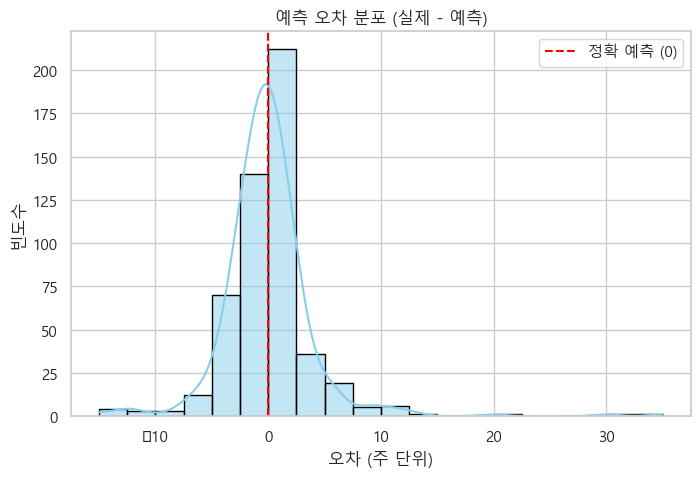

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 시각화 스타일 설정
sns.set(style="whitegrid", font="Malgun Gothic")  # 한글 폰트 설정 (Windows 기준)

# 오차 분포 히스토그램
plt.figure(figsize=(8,5))
sns.histplot(df_test_encoded["Diff"], kde=True, bins=20, color="skyblue", edgecolor="black")
plt.axvline(0, color="red", linestyle="--", label="정확 예측 (0)")
plt.title("예측 오차 분포 (실제 - 예측)")
plt.xlabel("오차 (주 단위)")
plt.ylabel("빈도수")
plt.legend()
plt.show()

In [78]:
print(df_test_encoded[ df_test_encoded["Abs_Diff"] >= 10 ][['Movie_Title','Total_Weeks','Total_weeks_predict']])

                      Movie_Title  Total_Weeks  Total_weeks_predict
2063  인피니트 15주년 콘서트 리미티드 에디션 더 무비            4            15.871185
2078                         색, 계           26            16.219342
2079                           원스           33            22.007970
2095                     컴플리트 언노운           19             6.107564
2112                    마당을 나온 암탉           24            12.052661
2147                    프리즌 이스케이프           11            22.787937
2168                      퍼펙트 데이즈           39            18.597239
2229                          그루지            7            22.073774
2262                         데스노트            6            17.766223
2269                      한국이 싫어서           17             6.605492
2389                  아치의 노래, 정태춘           24            12.790611
2432                      본 얼티메이텀           10            22.650353
2485                   권순분여사 납치사건            7            21.951589
2488                       위대한 침묵           52  